In [1]:
import pandas as pd

In [2]:
meta = pd.read_csv('AnonDB.csv')

In [3]:
meta.head()

,Unnamed: 0,Mod_ID,Confidential,Make,Model,Interconnect_Tech,Module_Area_(cm2),Junction_Box_Type,Cell_Wafer_Type,Cell_Tech,...,ELLPath,IVPath,Ref,Exposure_Step,Total_Exposure_Steps,RefIVPath,RefA,RefRefA,Ref_IV_Date,Ref_IV_Time
0,0,3903,NaN,35,1,NaN,16222.6,NaN,mono-Si module,NaN,...,./EL/3903_35_1_01272020_20.tiff,./IV/3903_35_1_01242020.csv,0,0,1,./RefIV/3903_35_1_01242020.csv,8.862,8.862,4/24/2018,10:45:34
1,1,3887,NaN,35,1,NaN,16222.6,NaN,mono-Si module,NaN,...,./EL/3887_35_1_01272020_20.tiff,./IV/3887_35_1_01242020.csv,0,0,2,./RefIV/3887_35_1_01242020.csv,8.862,8.862,4/24/2018,8:25:17
2,2,3887,NaN,35,1,NaN,16222.6,NaN,mono-Si module,NaN,...,./EL/3887_35_1_02222021_20.tiff,./IV/3887_35_1_02112021.csv,0,1,2,./RefIV/3887_35_1_02112021.csv,8.862,8.862,4/24/2018,8:25:17
3,3,3899,NaN,35,1,NaN,16222.6,NaN,mono-Si module,NaN,...,./EL/3899_35_1_01272020_20.tiff,./IV/3899_35_1_01242020.csv,0,0,2,./RefIV/3899_35_1_01242020.csv,8.862,8.862,4/24/2018,10:22:46
4,4,3899,NaN,35,1,NaN,16222.6,NaN,mono-Si module,NaN,...,./EL/3899_35_1_02222021_20.tiff,./IV/3899_35_1_02112021.csv,0,1,2,./RefIV/3899_35_1_02112021.csv,8.862,8.862,4/24/2018,10:22:46


In [4]:
pd.set_option('display.max_columns', None)

print(meta.columns.tolist())


['Unnamed: 0', 'Mod_ID', 'Confidential', 'Make', 'Model', 'Interconnect_Tech', 'Module_Area_(cm2)', 'Junction_Box_Type', 'Cell_Wafer_Type', 'Cell_Tech', 'Cell_Area_(cm2)', 'Total_Exposure', 'Nameplate_Isc_(A)', 'Nameplate_Voc_(V)', 'Nameplate_Imp_(A)', 'Nameplate_Vmp_(V)', 'Nameplate_Pmp_(W)', 'Isc_(A)', 'Voc_(V)', 'Imp_(A)', 'Vmp_(V)', 'Pmp_(W)', 'FF_(percent)', 'Measured_Temperature_(C)', 'Temp_Measurement_Method', 'Voltage_Temperature_Coefficient_(mV/C)', 'Simulator_Make', 'Simulator_Model', 'IV_Date', 'IV_Time', 'IV_Lab_Location', 'Camera_Make', 'Camera_Model', 'Detector_Type', 'Image_Resolution_(MP)', 'Longpass_Filter_Wavelength_(nm)', 'High_Applied_Current_(A)', 'High_Applied_Voltage_(V)', 'High_Sensor_Exposure_Time_(s)', 'Low_Applied_Current_(A)', 'Low_Applied_Voltage_(V)', 'Low_Sensor_Exposure_Time_(s)', 'ISO', 'Aperture', 'High_Temperature_(C)', 'Low_Temperature_(C)', 'Working_Distance_(m)', 'High_EL_Date', 'High_EL_Time', 'Low_EL_Date', 'Low_EL_Time', 'EL_Lab_Location', 'ELHP

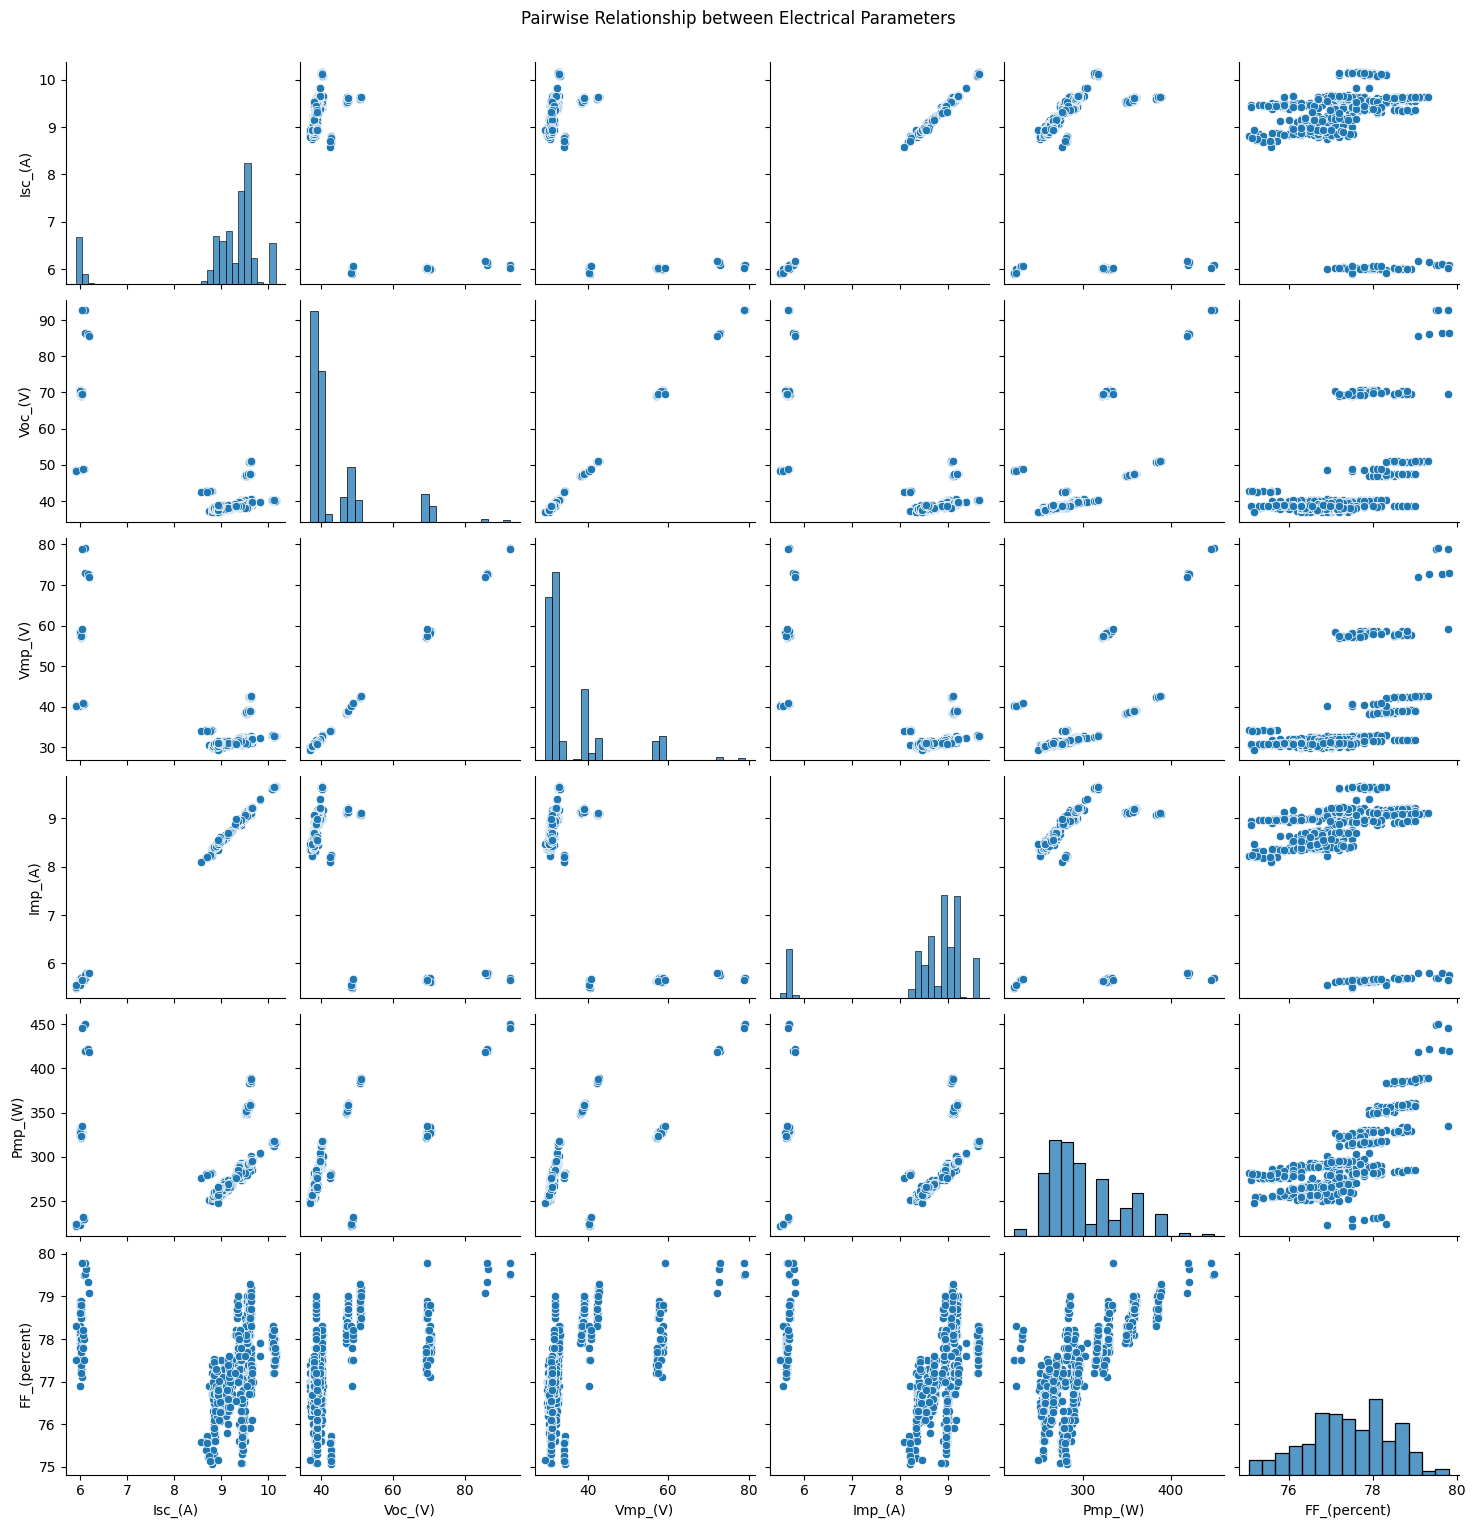

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Isc_(A)', 'Voc_(V)', 'Vmp_(V)', 'Imp_(A)', 'Pmp_(W)', 'FF_(percent)']
sns.pairplot(meta[cols])
plt.suptitle("Pairwise Relationship between Electrical Parameters", y=1.02)
plt.show()

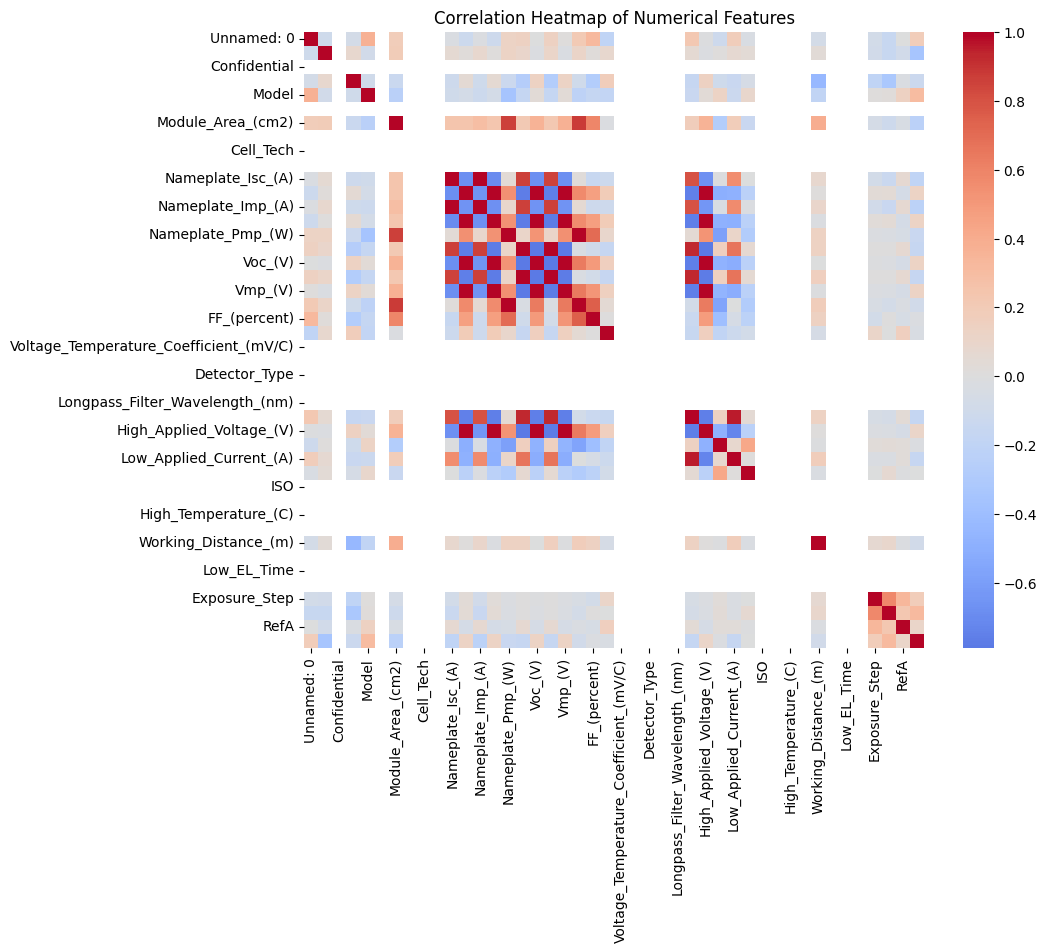

In [6]:
import numpy as np

num_cols = meta.select_dtypes(include=np.number).columns
corr = meta[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Cell_Tech', y='Pmp_(W)', data=cols)
plt.title("Distribution of Power Output (Pmp) by Cell Technology")
plt.xticks(rotation=45)
plt.show()


TypeError: Data source must be a DataFrame or Mapping, not <class 'list'>.

<Figure size 1200x600 with 0 Axes>

In [9]:
# Basic structure
meta.info()

# Missing values
meta.isnull().sum().sort_values(ascending=False).head(10)

# Basic numerical stats
meta.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 63 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              616 non-null    int64  
 1   Mod_ID                                  616 non-null    int64  
 2   Confidential                            0 non-null      float64
 3   Make                                    616 non-null    int64  
 4   Model                                   616 non-null    int64  
 5   Interconnect_Tech                       0 non-null      float64
 6   Module_Area_(cm2)                       616 non-null    float64
 7   Junction_Box_Type                       0 non-null      float64
 8   Cell_Wafer_Type                         616 non-null    object 
 9   Cell_Tech                               0 non-null      float64
 10  Cell_Area_(cm2)                         0 non-null      float6

,Unnamed: 0,Mod_ID,Confidential,Make,Model,Interconnect_Tech,Module_Area_(cm2),Junction_Box_Type,Cell_Tech,Cell_Area_(cm2),Nameplate_Isc_(A),Nameplate_Voc_(V),Nameplate_Imp_(A),Nameplate_Vmp_(V),Nameplate_Pmp_(W),Isc_(A),Voc_(V),Imp_(A),Vmp_(V),Pmp_(W),FF_(percent),Measured_Temperature_(C),Voltage_Temperature_Coefficient_(mV/C),Camera_Model,Detector_Type,Image_Resolution_(MP),Longpass_Filter_Wavelength_(nm),High_Applied_Current_(A),High_Applied_Voltage_(V),High_Sensor_Exposure_Time_(s),Low_Applied_Current_(A),Low_Sensor_Exposure_Time_(s),ISO,Aperture,High_Temperature_(C),Low_Temperature_(C),Working_Distance_(m),High_EL_Time,Low_EL_Time,Ref,Exposure_Step,Total_Exposure_Steps,RefA,RefRefA
count,616.000000,616.000000,0.0,616.000000,616.000000,0.0,616.000000,0.0,0.0,0.0,598.000000,598.000000,598.000000,598.000000,598.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,0.0,0.0,0.0,0.0,0.0,608.000000,608.000000,608.000000,608.000000,608.000000,0.0,0.0,0.0,0.0,567.000000,0.0,0.0,616.0,616.000000,616.000000,573.000000,510.000000
mean,307.500000,4111.707792,NaN,20.271104,2.681818,NaN,17189.678734,NaN,NaN,NaN,9.312258,43.671756,8.822140,35.703378,302.157191,9.013322,43.871602,8.566731,35.826599,299.618734,77.412903,25.009091,NaN,NaN,NaN,NaN,NaN,7.255896,45.522490,20.451743,1.815484,99.284852,NaN,NaN,NaN,NaN,2.382011,NaN,NaN,0.0,0.303571,1.610390,8.864597,8.939656
std,177.968162,1161.541979,NaN,9.624302,1.877395,NaN,1505.372908,NaN,NaN,NaN,1.326177,8.835525,1.283277,7.494130,39.527511,1.105442,10.132816,1.079278,8.740216,40.110209,0.989653,0.215758,NaN,NaN,NaN,NaN,NaN,0.973237,10.293768,18.645052,0.334299,205.476647,NaN,NaN,NaN,NaN,0.165720,NaN,NaN,0.0,0.490946,0.576637,0.022349,0.121636
min,0.000000,2436.000000,NaN,5.000000,1.000000,NaN,12425.200000,NaN,NaN,NaN,5.990000,37.700000,5.610000,30.800000,230.000000,5.898000,36.940000,5.483000,29.321100,221.500000,75.054000,24.100000,NaN,NaN,NaN,NaN,NaN,1.206000,35.940000,0.600000,1.166000,1.280000,NaN,NaN,NaN,NaN,1.800000,NaN,NaN,0.0,0.000000,1.000000,8.714000,8.714000
25%,153.750000,3626.000000,NaN,12.000000,1.000000,NaN,16351.500000,NaN,NaN,NaN,9.090000,38.400000,8.520000,31.400000,270.000000,9.001700,38.227500,8.553750,30.880000,268.050000,76.700000,24.900000,NaN,NaN,NaN,NaN,NaN,7.278000,39.923000,8.000000,1.800000,38.400000,NaN,NaN,NaN,NaN,2.360000,NaN,NaN,0.0,0.000000,1.000000,8.862000,8.862000
50%,307.500000,3890.000000,NaN,20.000000,2.000000,NaN,16690.000000,NaN,NaN,NaN,9.610000,39.900000,9.170000,32.410000,300.000000,9.376500,39.540000,8.945500,32.075000,288.500000,77.400000,25.000000,NaN,NaN,NaN,NaN,NaN,7.508000,41.241000,12.800000,1.880000,51.200000,NaN,NaN,NaN,NaN,2.360000,NaN,NaN,0.0,0.000000,2.000000,8.862000,8.862000
75%,461.250000,4281.250000,NaN,25.000000,4.000000,NaN,17112.900000,NaN,NaN,NaN,9.770000,47.870000,9.260000,38.940000,325.000000,9.585250,47.235000,9.141000,38.662500,326.900000,78.100000,25.200000,NaN,NaN,NaN,NaN,NaN,7.698000,48.907250,25.600000,1.920000,114.600000,NaN,NaN,NaN,NaN,2.360000,NaN,NaN,0.0,1.000000,2.000000,8.862000,9.025600
max,615.000000,10333.000000,NaN,38.000000,10.000000,NaN,21620.800000,NaN,NaN,NaN,12.200000,69.700000,11.600000,58.000000,400.000000,10.160000,92.729700,9.666000,79.046100,449.515000,79.795000,25.900000,NaN,NaN,NaN,NaN,NaN,8.936000,94.686000,76.800000,7.638000,3072.000000,NaN,NaN,NaN,NaN,2.760000,NaN,NaN,0.0,2.000000,3.000000,9.025600,9.248000


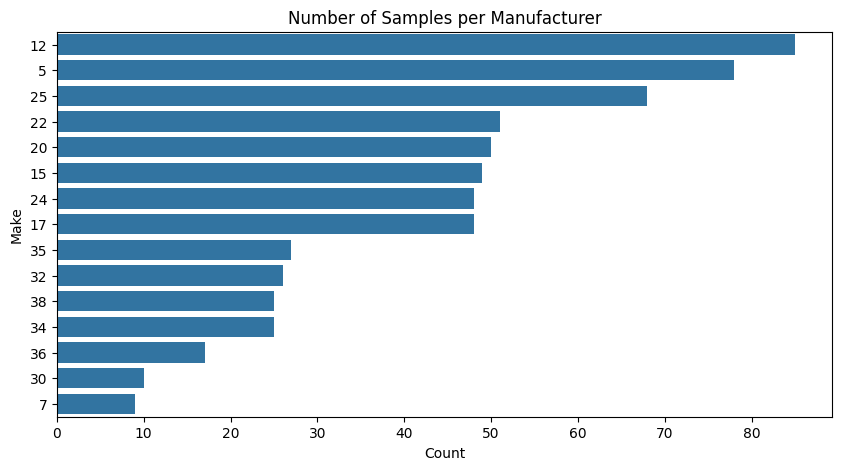

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(y='Make', data=meta, order=meta['Make'].value_counts().index)
plt.title('Number of Samples per Manufacturer')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()


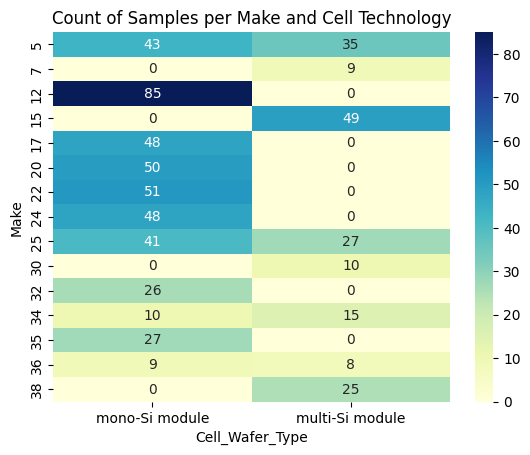

In [17]:
pd.crosstab(meta['Make'], meta['Cell_Wafer_Type'])
sns.heatmap(pd.crosstab(meta['Make'], meta['Cell_Wafer_Type']), cmap='YlGnBu', annot=True, fmt='d')
plt.title('Count of Samples per Make and Cell Technology')
plt.show()


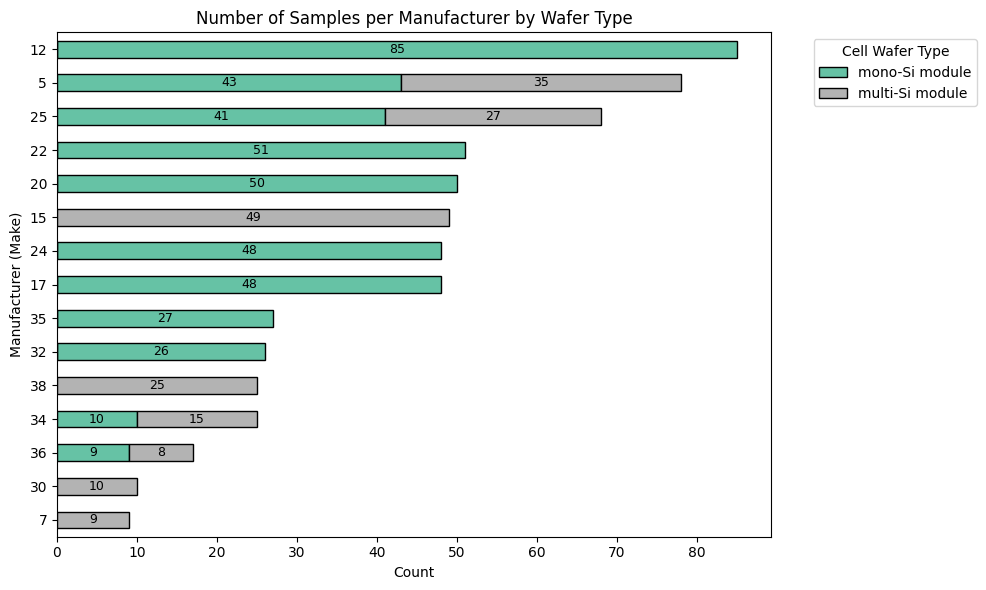

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group and pivot
count_df = (meta
            .groupby(['Make', 'Cell_Wafer_Type'])
            .size()
            .reset_index(name='Count')
            .pivot(index='Make', columns='Cell_Wafer_Type', values='Count')
            .fillna(0))

# Sort by total count
count_df = count_df.loc[count_df.sum(axis=1).sort_values(ascending=True).index]

# Plot
fig, ax = plt.subplots(figsize=(10,6))
count_df.plot(kind='barh', stacked=True, ax=ax, colormap='Set2', edgecolor='black')

# Add labels inside bars
for i, (idx, row) in enumerate(count_df.iterrows()):
    cumulative = 0
    for wafer_type in count_df.columns:
        val = row[wafer_type]
        if val > 0:
            ax.text(cumulative + val/2, i, int(val),
                    ha='center', va='center', fontsize=9, color='black')
            cumulative += val

# Style
ax.set_title('Number of Samples per Manufacturer by Wafer Type')
ax.set_xlabel('Count')
ax.set_ylabel('Manufacturer (Make)')
ax.legend(title='Cell Wafer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd
import numpy as np

df = meta.copy()

# ---- Choose metric (default: performance ratio) ----
# If Nameplate_Pmp exists, use ratio. Else fall back to FF.
has_nameplate = 'Nameplate_Pmp_(W)' in df.columns and df['Nameplate_Pmp_(W)'].notna().any()

if has_nameplate:
    df['perf_metric'] = df['Pmp_(W)'] / df['Nameplate_Pmp_(W)']
else:
    # Normalize FF to 0..1 so higher is better
    df['perf_metric'] = df['FF_(percent)'] / 100.0

# Keep only rows that have a valid low-bias EL path
df = df[df['ELLPath'].notna() & (df['ELLPath'].astype(str).str.len() > 0)]

# Safety: drop inf/NaN metrics
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['perf_metric'])

# ---- Get best & worst per Cell_Wafer_Type ----
idx_best  = df.groupby('Cell_Wafer_Type')['perf_metric'].idxmax()
idx_worst = df.groupby('Cell_Wafer_Type')['perf_metric'].idxmin()

best_df  = df.loc[idx_best].assign(Rank='Best')
worst_df = df.loc[idx_worst].assign(Rank='Worst')

out = (pd.concat([best_df, worst_df], axis=0)
         .sort_values(['Cell_Wafer_Type','Rank'])
         [ ['Cell_Wafer_Type','Rank','Make','Model','Mod_ID',
             'Pmp_(W)'] + (['Nameplate_Pmp_(W)'] if has_nameplate else []) +
           ['perf_metric','ELLPath'] ])

# Pretty metric name
out = out.rename(columns={'perf_metric': ('Perf_Ratio' if has_nameplate else 'FF_norm')})

print(out.to_string(index=False))


Cell_Wafer_Type  Rank  Make  Model  Mod_ID  Pmp_(W)  Nameplate_Pmp_(W)  Perf_Ratio                          ELLPath
 mono-Si module  Best    34      5   10328  256.900              245.0    1.048571 ./EL/10328_34_5_01202020_20.tiff
 mono-Si module Worst    20      1    4240  279.400              300.0    0.931333  ./EL/4240_20_1_02042021_20.tiff
multi-Si module  Best    38      2    3190  261.226              255.0    1.024416  ./EL/3190_38_2_12162015_20.tiff
multi-Si module Worst    34     10    3333  276.174              290.0    0.952324 ./EL/3333_34_10_03142016_20.tiff


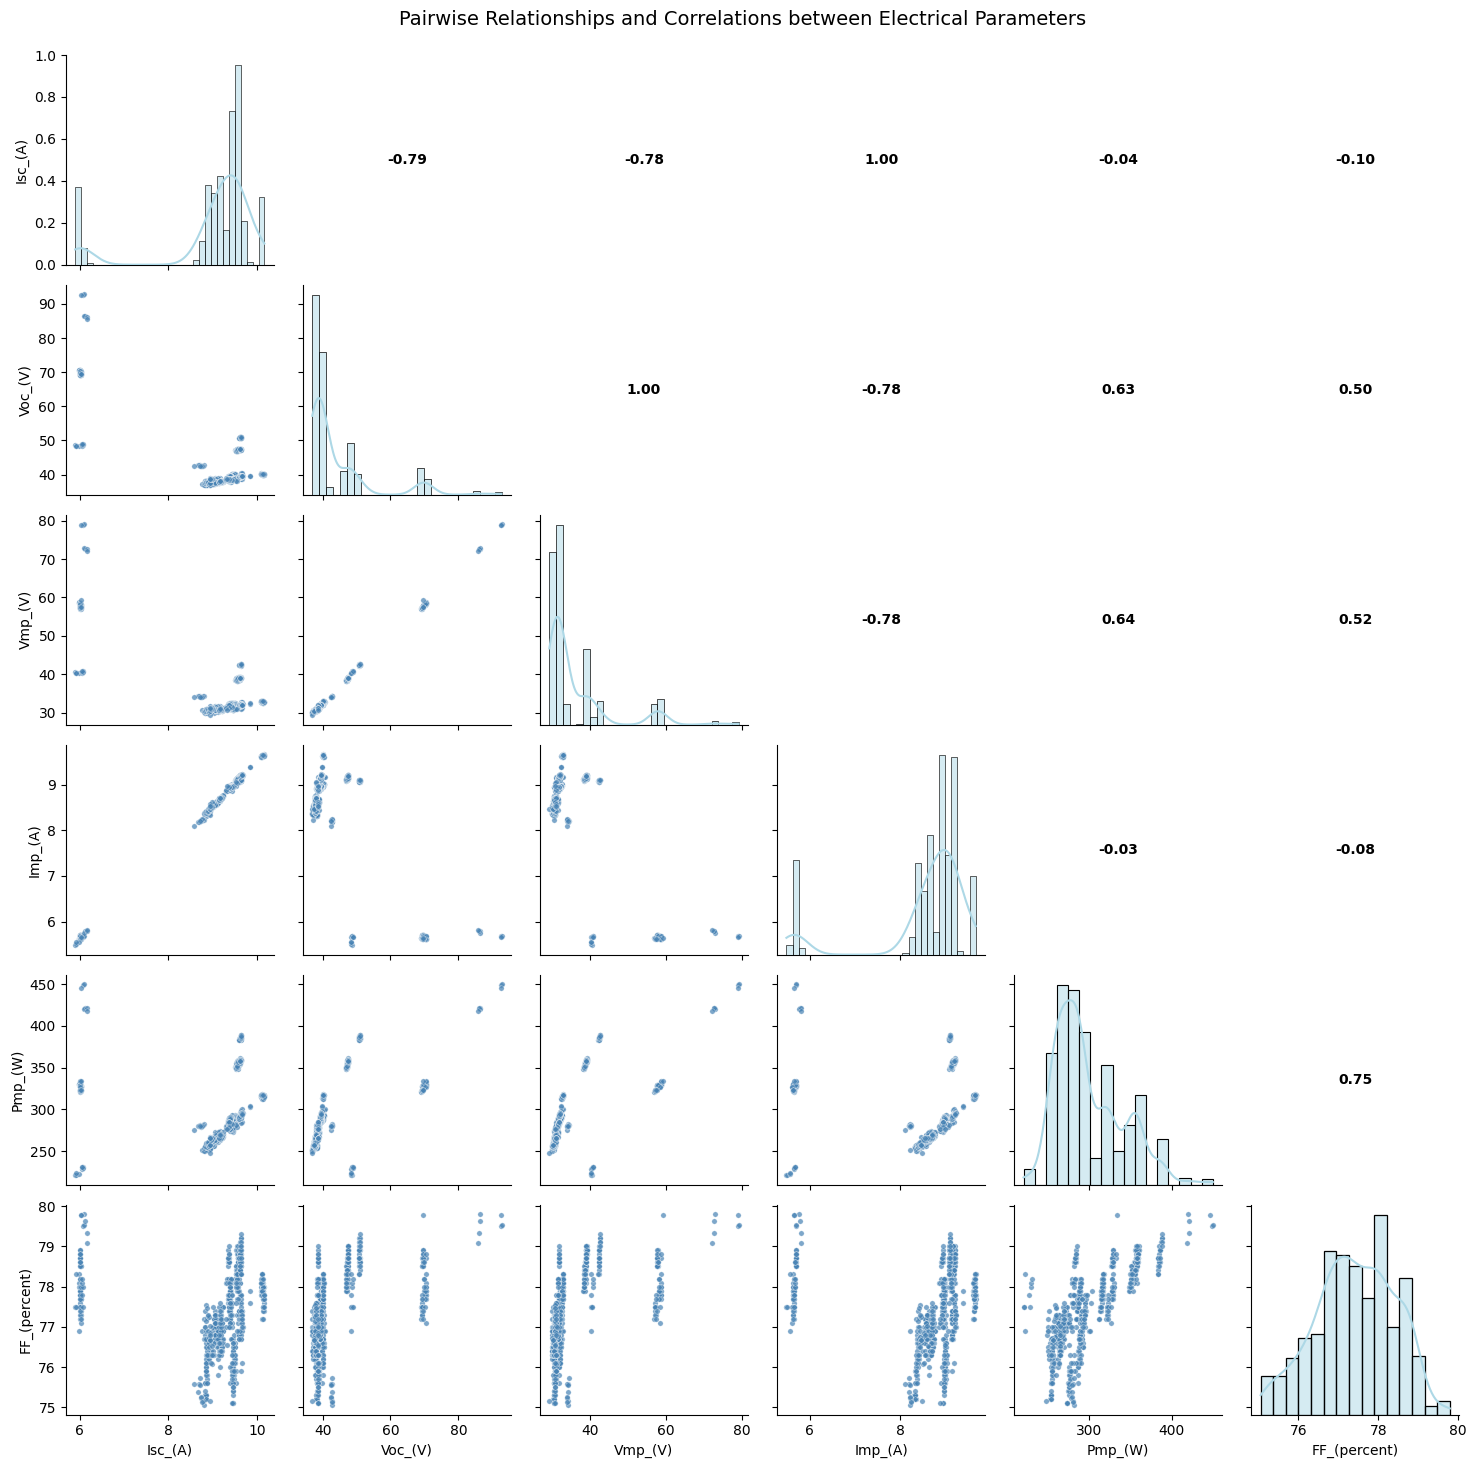

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cols = ['Isc_(A)', 'Voc_(V)', 'Vmp_(V)', 'Imp_(A)', 'Pmp_(W)', 'FF_(percent)']
df = meta[cols].copy()

# Create PairGrid
g = sns.PairGrid(df, diag_sharey=False)

# Lower triangle → scatter plots
g.map_lower(sns.scatterplot, s=15, color="steelblue", alpha=0.7)

# Upper triangle → correlation text heatmap
def corr_coefficient(x, y, **kwargs):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.set_axis_off()
    ax.text(0.5, 0.5, f"{r:.2f}",
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=10,
            fontweight='bold',
            color='black',
            transform=ax.transAxes)

g.map_upper(corr_coefficient)

# Diagonal → histograms
g.map_diag(sns.histplot, kde=True, color="lightblue")

# Titles and layout
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Pairwise Relationships and Correlations between Electrical Parameters", fontsize=14)
plt.show()


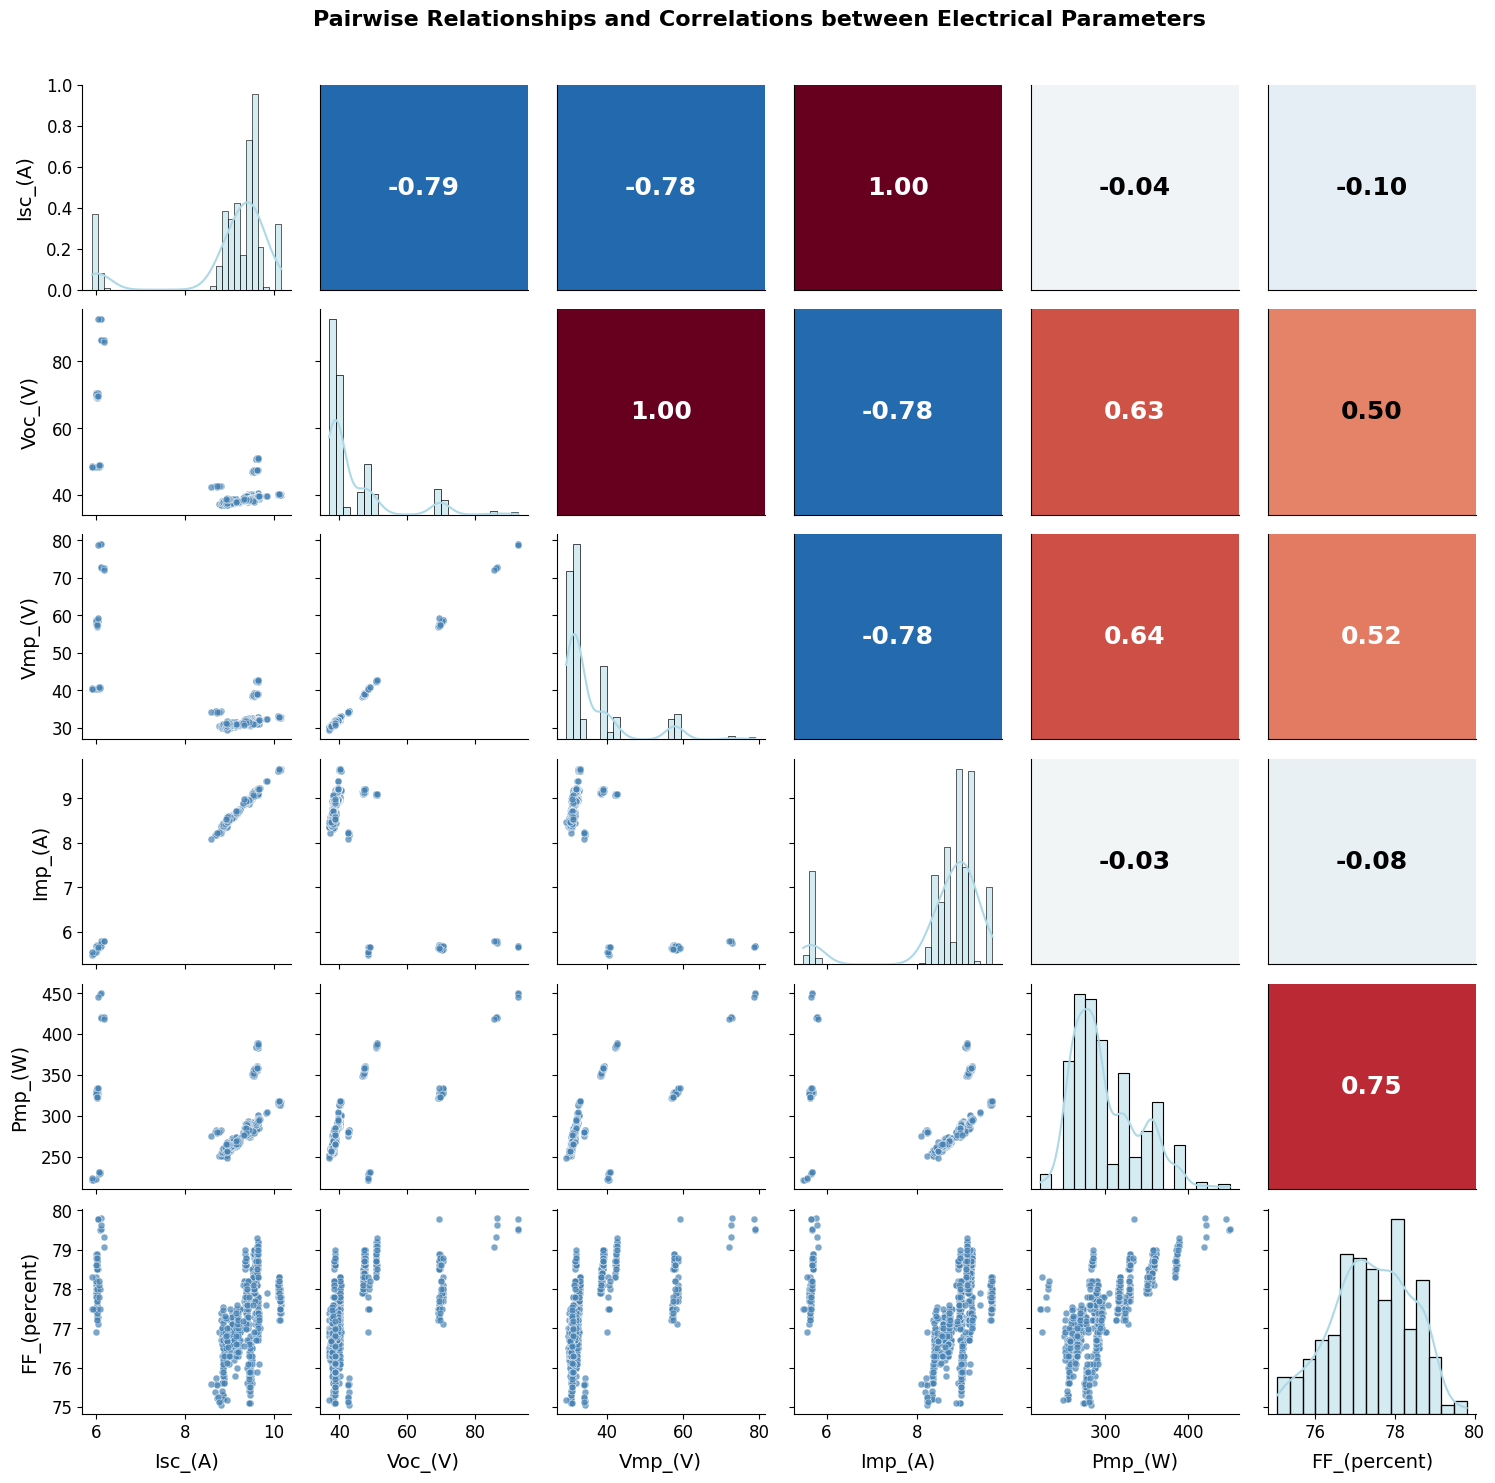

In [22]:

cols = ['Isc_(A)', 'Voc_(V)', 'Vmp_(V)', 'Imp_(A)', 'Pmp_(W)', 'FF_(percent)']
df = meta[cols].copy()

# === Create PairGrid ===
g = sns.PairGrid(df, diag_sharey=False)

# Lower triangle → scatter
g.map_lower(sns.scatterplot, s=25, color="steelblue", alpha=0.7)

# Upper triangle → correlation + colored background
def corr_heatmap(x, y, **kwargs):
    ax = plt.gca()
    r = np.corrcoef(x, y)[0, 1]
    cmap = plt.cm.RdBu_r
    ax.set_facecolor(cmap((r + 1) / 2))
    # Hide ticks inside upper triangle only
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    # Display correlation number
    ax.text(0.5, 0.5, f"{r:.2f}",
            ha='center', va='center',
            fontsize=18, fontweight='bold',
            color='white' if abs(r) > 0.5 else 'black',
            transform=ax.transAxes)

g.map_upper(corr_heatmap)

# Diagonal → histograms
g.map_diag(sns.histplot, kde=True, color="lightblue")

# === Style and labels ===
for i, label in enumerate(cols):
    g.axes[-1, i].set_xlabel(label, fontsize=14, labelpad=8)
    g.axes[i, 0].set_ylabel(label, fontsize=14, labelpad=8)

# Make tick labels larger (scatter/hist only)
for ax in g.axes.flatten():
    ax.tick_params(axis='both', labelsize=12)

plt.subplots_adjust(top=0.93)
g.fig.suptitle("Pairwise Relationships and Correlations between Electrical Parameters",
               fontsize=16, fontweight='bold')

plt.show()


c:\Users\Ghozy Abror\miniconda3\envs\keras_env\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Ghozy Abror\miniconda3\envs\keras_env\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Ghozy Abror\miniconda3\envs\keras_env\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\User

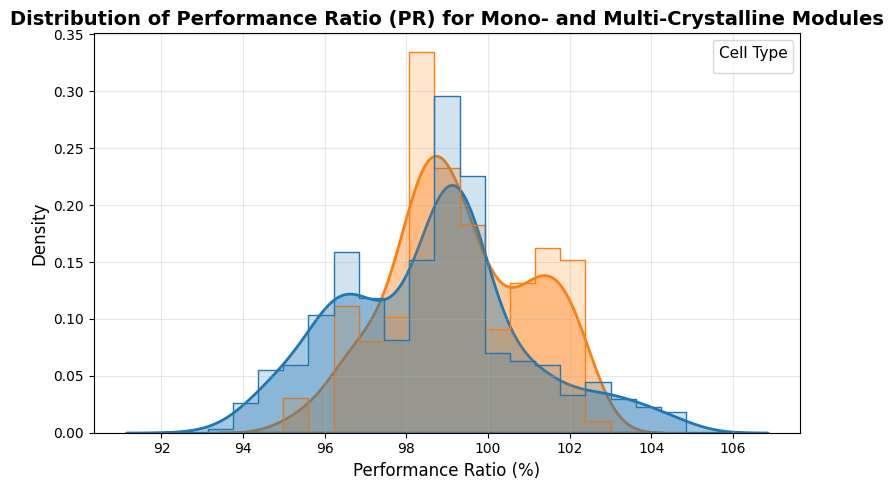

In [23]:


# --- Calculate Performance Ratio (PR) ---
meta['PR'] = meta['Pmp_(W)'] / meta['Nameplate_Pmp_(W)'] * 100

# --- Filter only relevant cell types ---
df = meta[meta['Cell_Wafer_Type'].isin(['mono-Si module', 'multi-Si module'])].copy()

# --- Plot overlapped KDE/histogram ---
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='PR', hue='Cell_Wafer_Type', fill=True, common_norm=False, alpha=0.4, linewidth=2)
sns.histplot(data=df, x='PR', hue='Cell_Wafer_Type', element='step', stat='density', common_norm=False, alpha=0.2)

# --- Styling ---
plt.title('Distribution of Performance Ratio (PR) for Mono- and Multi-Crystalline Modules', fontsize=14, fontweight='bold')
plt.xlabel('Performance Ratio (%)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Cell Type', fontsize=10, title_fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


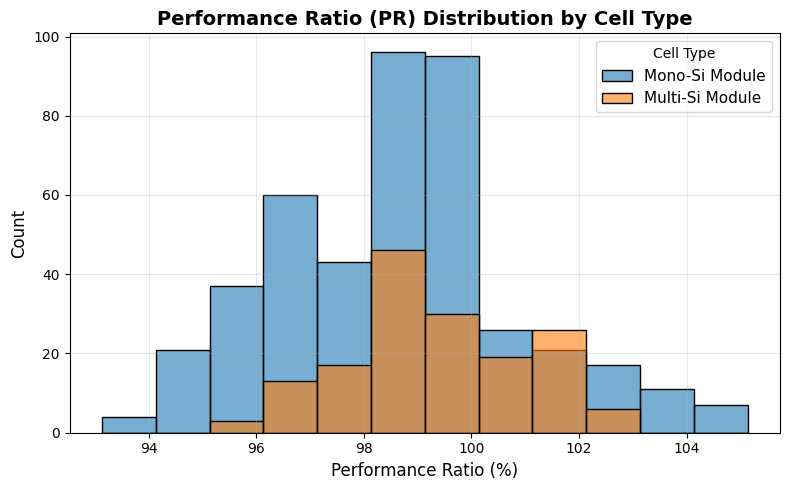

In [24]:
# --- Calculate Performance Ratio (PR) ---
meta['PR'] = meta['Pmp_(W)'] / meta['Nameplate_Pmp_(W)'] * 100

# --- Filter only relevant types ---
df = meta[meta['Cell_Wafer_Type'].isin(['mono-Si module', 'multi-Si module'])].copy()

# --- Set bin edges (shared bins for both types) ---
bins = np.arange(df['PR'].min(), df['PR'].max() + 1, 1)

# --- Create histogram data manually for control ---
plt.figure(figsize=(8,5))
sns.histplot(df[df['Cell_Wafer_Type'] == 'mono-Si module']['PR'],
             bins=bins, color='tab:blue', alpha=0.6,
             label='Mono-Si Module', kde=False)

sns.histplot(df[df['Cell_Wafer_Type'] == 'multi-Si module']['PR'],
             bins=bins, color='tab:orange', alpha=0.6,
             label='Multi-Si Module', kde=False)

# --- Style and labels ---
plt.title('Performance Ratio (PR) Distribution by Cell Type', fontsize=14, fontweight='bold')
plt.xlabel('Performance Ratio (%)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Cell Type', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


c:\Users\Ghozy Abror\miniconda3\envs\keras_env\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Ghozy Abror\miniconda3\envs\keras_env\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Ghozy Abror\miniconda3\envs\keras_env\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


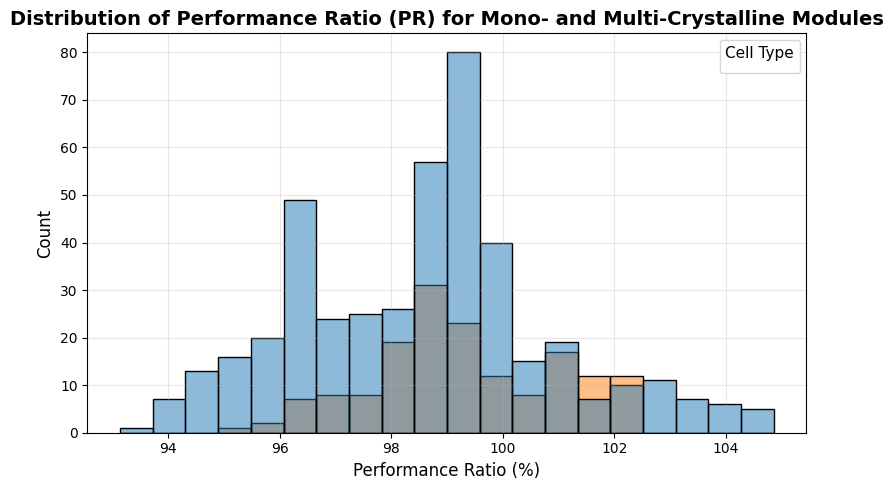

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Calculate Performance Ratio (PR) ---
meta['PR'] = meta['Pmp_(W)'] / meta['Nameplate_Pmp_(W)'] * 100

# --- Filter only mono & multi crystalline ---
df = meta[meta['Cell_Wafer_Type'].isin(['mono-Si module', 'multi-Si module'])].copy()

# --- Plot both together (shared bins & widths) ---
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='PR', hue='Cell_Wafer_Type',
             multiple='layer',  # overlap, not stack
             bins=20, stat='count',
             palette={'mono-Si module':'tab:blue', 'multi-Si module':'tab:orange'},
             alpha=0.5, edgecolor='black')

# --- Optional: bring multi-Si to front by reordering legend and hue order ---
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title='Cell Type',
           fontsize=10, title_fontsize=11, loc='upper right', frameon=True)

# --- Style ---
plt.title('Distribution of Performance Ratio (PR) for Mono- and Multi-Crystalline Modules',
          fontsize=14, fontweight='bold')
plt.xlabel('Performance Ratio (%)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


c:\Users\Ghozy Abror\miniconda3\envs\keras_env\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Ghozy Abror\miniconda3\envs\keras_env\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Ghozy Abror\miniconda3\envs\keras_env\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


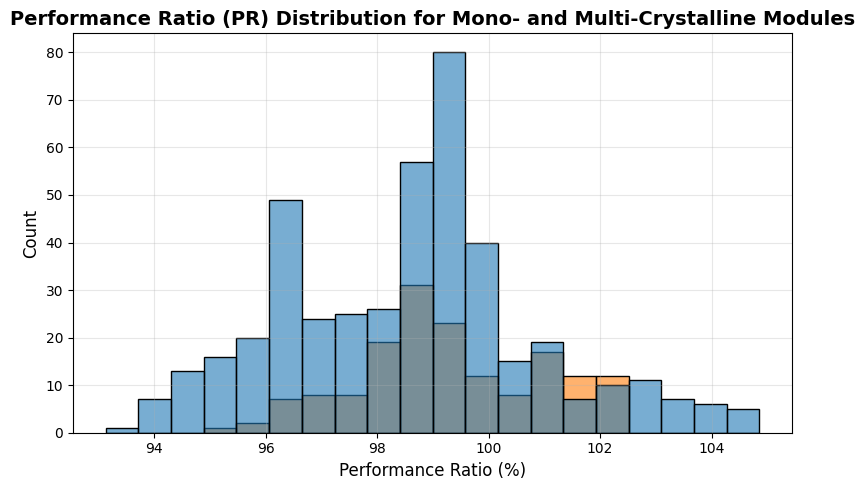

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Compute Performance Ratio (PR) ---
meta['PR'] = meta['Pmp_(W)'] / meta['Nameplate_Pmp_(W)'] * 100

# --- Keep only relevant cell types ---
df = meta[meta['Cell_Wafer_Type'].isin(['mono-Si module', 'multi-Si module'])].copy()

# --- Ensure consistent hue order (mono behind, multi front) ---
hue_order = ['mono-Si module', 'multi-Si module']

# --- Plot with shared bins and count scale ---
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='PR', hue='Cell_Wafer_Type',
             hue_order=hue_order, multiple='layer',
             bins=20, stat='count', edgecolor='black',
             palette={'mono-Si module':'tab:blue', 'multi-Si module':'tab:orange'},
             alpha=0.6)

# --- Remove legend completely ---
plt.legend([], [], frameon=False)

# --- Styling ---
plt.title('Performance Ratio (PR) Distribution for Mono- and Multi-Crystalline Modules',
          fontsize=14, fontweight='bold')
plt.xlabel('Performance Ratio (%)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


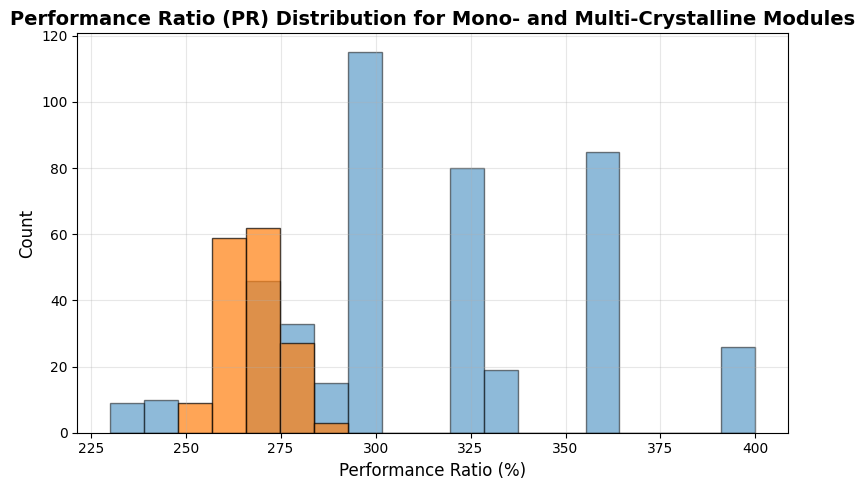

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Compute Performance Ratio (PR) ---
meta['PR'] = meta['Nameplate_Pmp_(W)']#meta['Pmp_(W)'] / meta['Nameplate_Pmp_(W)'] * 100

# --- Subset each type ---
mono = meta[meta['Cell_Wafer_Type'] == 'mono-Si module']['PR']
multi = meta[meta['Cell_Wafer_Type'] == 'multi-Si module']['PR']

# --- Shared bins ---
bins = np.linspace(min(meta['PR']), max(meta['PR']), 20)

plt.figure(figsize=(8,5))

# --- Draw mono first (background) ---
plt.hist(mono, bins=bins, color='tab:blue', alpha=0.5,
         edgecolor='black', label='Mono-Si Module')

# --- Draw multi second (foreground) ---
plt.hist(multi, bins=bins, color='tab:orange', alpha=0.7,
         edgecolor='black', label='Multi-Si Module')

# --- Remove legend ---
plt.legend([], [], frameon=False)

# --- Labels and style ---
plt.title('Performance Ratio (PR) Distribution for Mono- and Multi-Crystalline Modules',
          fontsize=14, fontweight='bold')
plt.xlabel('Performance Ratio (%)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Compute Performance Ratio (PR) ---
meta['PR'] = meta['Pmp_(W)'] / meta['Nameplate_Pmp_(W)'] * 100

# --- Split by cell type ---
mono = meta[meta['Cell_Wafer_Type'] == 'mono-Si module']['PR']
multi = meta[meta['Cell_Wafer_Type'] == 'multi-Si module']['PR']

# --- Shared bins (same width & position) ---
bins = np.linspace(min(meta['PR']), max(meta['PR']), 20)

plt.figure(figsize=(8,5))

# --- Plot mono first (background) ---
plt.hist(mono, bins=bins, color='tab:blue', alpha=0.5,
         edgecolor='black', label='Mono-Si Module')

# --- Plot multi second (foreground) ---
plt.hist(multi, bins=bins, color='tab:orange', alpha=0.7,
         edgecolor='black', label='Multi-Si Module')

# --- Add legend ---
plt.legend(title='Cell Type', fontsize=10, title_fontsize=11, loc='upper right', frameon=True)

# --- Labels and style ---
plt.title('Performance Ratio (PR) Distribution for Mono- and Multi-Crystalline Modules',
          fontsize=14, fontweight='bold')
plt.xlabel('Performance Ratio (%)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


NameError: name 'meta' is not defined

=== Pmp_(W) Summary ===
   Cell_Wafer_Type  count     mean     std      min      max
0   mono-Si module    438  310.136  37.739  221.500  388.900
1  multi-Si module    178  273.740  33.563  248.395  449.515
2      All modules    616  299.619  40.110  221.500  449.515


c:\Users\Ghozy Abror\miniconda3\envs\keras_env\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Ghozy Abror\miniconda3\envs\keras_env\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Ghozy Abror\miniconda3\envs\keras_env\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


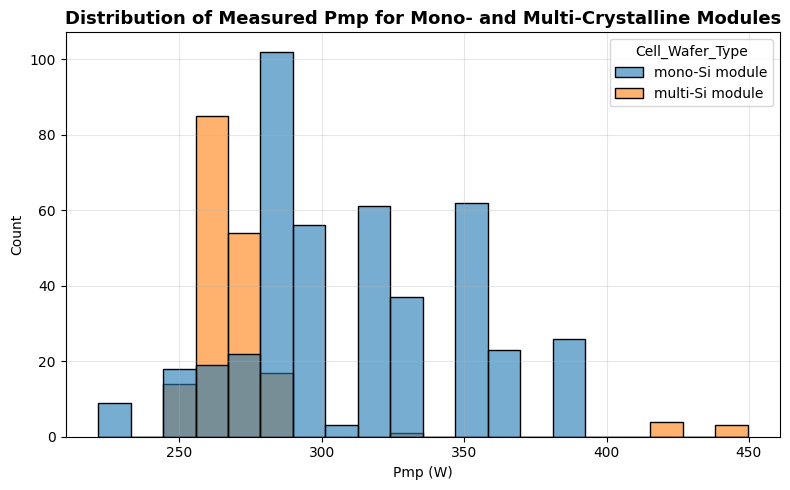

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Filter only valid data ===
df = meta.copy()
df = df[df['Cell_Wafer_Type'].isin(['mono-Si module', 'multi-Si module'])]
df = df.dropna(subset=['Pmp_(W)'])

# === Compute descriptive statistics ===
stats = (
    df.groupby('Cell_Wafer_Type')['Pmp_(W)']
      .agg(['count', 'mean', 'std', 'min', 'max'])
      .rename_axis('Cell_Wafer_Type')
      .reset_index()
)

# Add combined summary (both mono & multi)
overall = pd.DataFrame({
    'Cell_Wafer_Type': ['All modules'],
    'count': [df['Pmp_(W)'].count()],
    'mean': [df['Pmp_(W)'].mean()],
    'std': [df['Pmp_(W)'].std()],
    'min': [df['Pmp_(W)'].min()],
    'max': [df['Pmp_(W)'].max()]
})

stats = pd.concat([stats, overall], ignore_index=True)
print("=== Pmp_(W) Summary ===")
print(stats.round(3))

# === Plot distributions ===
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Pmp_(W)', hue='Cell_Wafer_Type',
             bins=20, alpha=0.6, edgecolor='black', stat='count')
plt.title('Distribution of Measured Pmp for Mono- and Multi-Crystalline Modules',
          fontsize=13, fontweight='bold')
plt.xlabel('Pmp (W)')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

# === Hitung Performance Ratio (PR) ===
meta['PR'] = meta['Nameplate_Pmp_(W)'] #meta['Pmp_(W)'] / meta['Nameplate_Pmp_(W)'] * 100

# === Filter hanya yang valid dan ada tipe wafer ===
df = meta[meta['Cell_Wafer_Type'].isin(['mono-Si module', 'multi-Si module'])].dropna(subset=['PR'])

# === Hitung statistik per jenis wafer ===
stats_pr = (
    df.groupby('Cell_Wafer_Type')['PR']
      .agg(['count', 'mean', 'std', 'min', 'max'])
      .rename_axis('Cell_Wafer_Type')
      .reset_index()
)

# === Tambahkan total keseluruhan ===
overall_pr = pd.DataFrame({
    'Cell_Wafer_Type': ['All modules'],
    'count': [df['PR'].count()],
    'mean': [df['PR'].mean()],
    'std': [df['PR'].std()],
    'min': [df['PR'].min()],
    'max': [df['PR'].max()]
})

stats_pr = pd.concat([stats_pr, overall_pr], ignore_index=True)

# === Tampilkan hasil ===
print(stats_pr.round(3))


   Cell_Wafer_Type  count     mean     std    min    max
0   mono-Si module    438  314.669  39.047  230.0  400.0
1  multi-Si module    160  267.906   8.019  255.0  290.0
2      All modules    598  302.157  39.528  230.0  400.0


In [4]:
# --- Calculate Performance Ratio (PR) ---
meta['PR'] = meta['Pmp_(W)'] / meta['Nameplate_Pmp_(W)'] * 100

In [6]:
meta['ELHPath'].head()

0    ./EL/3903_35_1_01272020_80.tiff
1    ./EL/3887_35_1_01272020_80.tiff
2    ./EL/3887_35_1_02222021_80.tiff
3    ./EL/3899_35_1_01272020_80.tiff
4    ./EL/3899_35_1_02222021_80.tiff
Name: ELHPath, dtype: object